# Trend filtering
For $\ell_1$ regularization, solve the following problem directly $$\min\frac{1}{2n}\|\mathbf{y}-\mathbf{\beta}\|_2^2+\|\mathbf{D\beta}\|_1,$$
where $\mathbf{D}$ is some difference matrix according a graph.

For $\ell_0$, the following can not be solved directly 
$$\min\frac{1}{2n}\|\mathbf{y}-\mathbf{\beta}\|_2^2\text{ s.t. }\|\mathbf{D\beta}\|_0\leq s$$
For some simple $\mathbf{D}$, we can reparametrize (not strictly) $\mathbf{\theta}=\mathbf{D\beta}$ and solve the following problem
$$\min\frac{1}{2n}\|\mathbf{y}-\mathbf{Q\theta}\|_2^2\text{ s.t. }\|\mathbf{\theta}\|_0\leq s.$$

For example, 
\begin{align*}
\mathbf{D} = 
\begin{bmatrix}
1 & -1 & 0 & \cdots & 0 & 0\\
0 & 1 & -1 & \cdots & 0 & 0\\
\vdots & \vdots & \vdots & & \vdots & \vdots\\
0 & 0 & 0 & \cdots & 1 & -1\\
\end{bmatrix}
\end{align*}
However, when $\mathbf{D}$ is complex, how to find $\mathbf{Q}$?

In [1]:
import numpy as np
import jax.numpy as jnp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from scope import ScopeSolver

import warnings
warnings.filterwarnings('ignore')

In [2]:
# random walk with normal increment
def gen_normal(n_step=500):
    x = np.random.randn(n_step) / jnp.sqrt(n_step)
    x = jnp.insert(x, 0, 0)
    y = jnp.cumsum(x)
    return y

def trend_filter(y, k):
    y = jnp.array(y)
    p = len(y)

    # we hope the jump is sparse, thus defining params
    # to be the successive increment of y, i.e.
    # y can be represented as the cumsum of params
    def custom_objective(params):
        return jnp.sum(jnp.square(y - jnp.cumsum(params)))  # the 
    
    solver = ScopeSolver(p, k)
    params = solver.solve(custom_objective)
    y_pred = jnp.cumsum(params)

    return y_pred

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


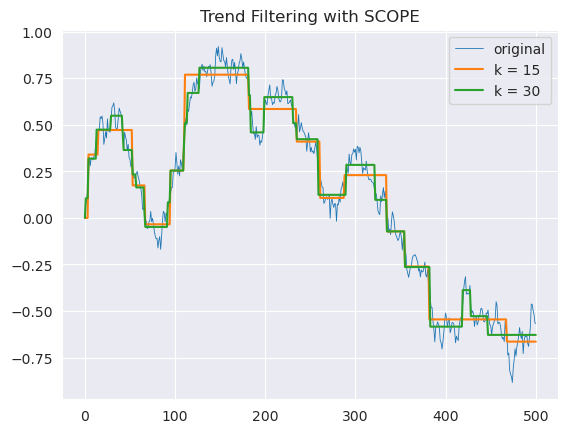

In [3]:
np.random.seed(0)
y = gen_normal(500)
k_list = [15, 30]
sns.lineplot(y, label='original', linewidth=0.6)
for k in k_list:
    yk = trend_filter(y=y, k=k)
    sns.lineplot(yk, label=r'k = {}'.format(k))

plt.legend()
plt.title('Trend Filtering with SCOPE')
plt.show()